In [97]:
import networkx as nx
import pandas as pd
import random
import time

In [98]:
visited = set()
colored = set()

colors_used = 0

In [99]:
graph ={
    0: [1, 2, 5],
    1: [0, 2, 3],
    2: [0, 1, 3, 4],
    3: [1, 2, 4, 6],
    4: [2, 3, 5, 6],
    5: [0, 4, 6],
    6: [3, 4, 5, 7],
    7: [6, 8, 9],
    8: [7, 9],
    9: [7, 8]
}

In [100]:
# colors = ['magenta', 'brown', 'gold', 'silver', 'skyblue', 'pink', 'red', 'blue', 'green', 'yellow']

colors = [color_val*1/len(graph) for color_val in range(len(graph))]
color_index = {c: i for i, c in enumerate(colors)}

In [101]:
final_colors = {}

In [102]:
possible_node_colors = {key: set(colors) for key in graph}
possible_node_colors[1]

{0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}

In [103]:
class NumberOfInsufficientColorsException(Exception):
    def __str__(self):
        return "Insufficient Number of colors"

In [104]:
def color_node(node: str|int|float) -> None: 
    if node not in visited:
        if len(possible_node_colors[node]) != 0:
            color = possible_node_colors[node].pop()
            final_colors[node] = color_index[color]
            colored.add(node)
        else:
            raise NumberOfInsufficientColorsException
        adjacency_list = graph[node]
        if len(adjacency_list) != 0:
            for each_node in adjacency_list:
                if each_node not in visited:
                    try:
                        possible_node_colors[each_node].remove(color)
                    except:
                        continue
def color_graph(graph: dict[str|int|float : list[str|int|float]]):
    for node in graph:
        try:
            color_node(node)
            visited.add(node)
        except Exception as e:
            print(e)
            break

In [105]:
def greedy_coloring(graph):
    result = {}
    for node in sorted(graph.keys()):
        neighbor_colors = set(result.get(neigh) for neigh in graph[node] if neigh in result)
        for color in range(len(graph)):
            if color not in neighbor_colors:
                result[node] = color
                break
    return result

def welsh_powell_coloring(graph):
    # Sort nodes by descending degree
    nodes = sorted(graph, key=lambda x: len(graph[x]), reverse=True)
    result = {}
    for node in nodes:
        neighbor_colors = set(result.get(neigh) for neigh in graph[node] if neigh in result)
        for color in range(len(graph)):
            if color not in neighbor_colors:
                result[node] = color
                break
    return result

def dsatur_coloring(graph):
    result = {}
    saturation = {node: 0 for node in graph}
    degrees = {node: len(neighs) for node, neighs in graph.items()}
    uncolored = set(graph.keys())
    while uncolored:
        # Pick node with highest saturation, break ties by degree
        node = max(uncolored, key=lambda n: (saturation[n], degrees[n]))
        neighbor_colors = set(result.get(neigh) for neigh in graph[node] if neigh in result)
        for color in range(len(graph)):
            if color not in neighbor_colors:
                result[node] = color
                break
        uncolored.remove(node)
        for neigh in graph[node]:
            if neigh in uncolored:
                saturation[neigh] = len(set(result.get(n) for n in graph[neigh] if n in result))
    return result

# Run and compare
greedy_colors = greedy_coloring(graph)
welsh_powell_colors = welsh_powell_coloring(graph)
dsatur_colors = dsatur_coloring(graph)

print("Greedy coloring:", greedy_colors)
print("Welsh-Powell coloring:", welsh_powell_colors)
print("DSATUR coloring:", dsatur_colors)

Greedy coloring: {0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 3, 7: 0, 8: 1, 9: 2}
Welsh-Powell coloring: {2: 0, 3: 1, 4: 2, 6: 0, 0: 1, 1: 2, 5: 3, 7: 1, 8: 0, 9: 2}
DSATUR coloring: {2: 0, 3: 1, 4: 2, 6: 0, 1: 2, 0: 1, 5: 3, 7: 1, 8: 0, 9: 2}


In [106]:
start_greedy = time.perf_counter()
greedy_coloring(graph)
end_greedy = time.perf_counter()
greedy_time = end_greedy - start_greedy

start_wp = time.perf_counter()
welsh_powell_coloring(graph)
end_wp = time.perf_counter()
wp_time = end_wp - start_wp

start_mycode = time.perf_counter()
color_graph(graph)
end_mycode = time.perf_counter()

start_dsatur = time.perf_counter()
dsatur_coloring(graph)
end_dsatur = time.perf_counter()
dsatur_time = end_dsatur - start_dsatur


print(f"Time for coloring: \n")
print(f"MyCode coloring time: {end_mycode-start_mycode:.7f}")
print(f"Greedy coloring time: {greedy_time:.7f} seconds")
print(f"Welsh-Powell coloring time: {wp_time:.7f} seconds")
print(f"DSATUR coloring time: {dsatur_time:.7f} seconds")

Time for coloring: 

MyCode coloring time: 0.0001849
Greedy coloring time: 0.0002091 seconds
Welsh-Powell coloring time: 0.0002744 seconds
DSATUR coloring time: 0.0002143 seconds


Time for coloring:

MyCode coloring time: 0.0000955  
Greedy coloring time: 0.0001054 seconds  
Welsh-Powell coloring time: 0.0000985 seconds  
DSATUR coloring time: 0.0001458 seconds  

Time for coloring: 

MyCode coloring time: 0.0001719  
Greedy coloring time: 0.0001839 seconds  
Welsh-Powell coloring time: 0.0001873 seconds  
DSATUR coloring time: 0.0002801 seconds

In [107]:
final_colors

{0: 0, 1: 4, 2: 1, 3: 0, 4: 4, 5: 1, 6: 3, 7: 0, 8: 4, 9: 1}

In [108]:
colors_used = len(colors) - min([len(possible_node_colors[node]) for node in graph])
colors_used

4

In [109]:
g = nx.Graph()
for node in graph:
    g.add_node(node)

for node in graph:
    for adjacent_node in graph[node]:
        try:
            g.add_edge(node, adjacent_node)
        except:
            continue

In [110]:
g.edges

EdgeView([(0, 1), (0, 2), (0, 5), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 6), (4, 5), (4, 6), (5, 6), (6, 7), (7, 8), (7, 9), (8, 9)])

In [111]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

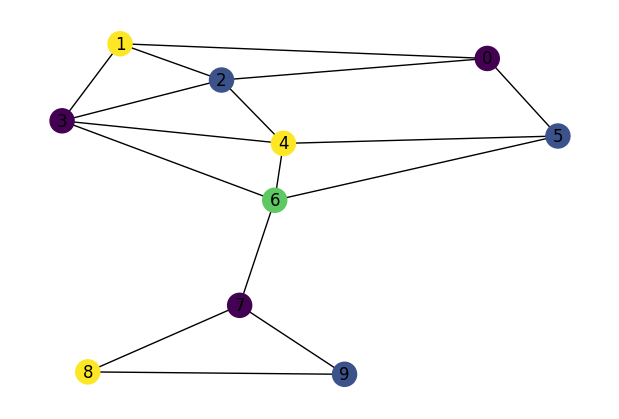

In [112]:
import matplotlib.pyplot as plt

actual_nodecolors = [final_colors[n] for n in g.nodes]

plt.figure(figsize=(6, 4))
nx.draw(g, pos=nx.spring_layout(g), with_labels=True, node_color=actual_nodecolors)
plt.show()